In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score, accuracy_score

# Data Train

In [86]:
absensi_train = pd.read_csv(r"E:\Lomba\MineToday Data Mining Competition – IT Today 2025\mine-today-data-mining-competition-it-today-2025\MineToday Dataset\train\train_absensi.csv")
mini_project_train = pd.read_csv(r"E:\Lomba\MineToday Data Mining Competition – IT Today 2025\mine-today-data-mining-competition-it-today-2025\MineToday Dataset\train\train_mini_project.csv")
pendaftaran_train = pd.read_csv(r"E:\Lomba\MineToday Data Mining Competition – IT Today 2025\mine-today-data-mining-competition-it-today-2025\MineToday Dataset\train\train_pendaftaran.csv")
pretest_ml_train = pd.read_csv(r"E:\Lomba\MineToday Data Mining Competition – IT Today 2025\mine-today-data-mining-competition-it-today-2025\MineToday Dataset\train\train_pretest_ml.csv")
pretest_py_train = pd.read_csv(r"E:\Lomba\MineToday Data Mining Competition – IT Today 2025\mine-today-data-mining-competition-it-today-2025\MineToday Dataset\train\train_pretest_py.csv")
pretest_st_train = pd.read_csv(r"E:\Lomba\MineToday Data Mining Competition – IT Today 2025\mine-today-data-mining-competition-it-today-2025\MineToday Dataset\train\train_pretest_st.csv")
weekly_quiz_train = pd.read_csv(r"E:\Lomba\MineToday Data Mining Competition – IT Today 2025\mine-today-data-mining-competition-it-today-2025\MineToday Dataset\train\train_weekly_quiz.csv")

# Prediction ID and Submission

In [87]:
prediction_id = pd.read_csv(r"E:\Lomba\MineToday Data Mining Competition – IT Today 2025\mine-today-data-mining-competition-it-today-2025\MineToday Dataset\prediction_id.csv")
submission = pd.read_csv(r"E:\Lomba\MineToday Data Mining Competition – IT Today 2025\mine-today-data-mining-competition-it-today-2025\MineToday Dataset\submission_example.csv")

# Data test

In [88]:
absensi_test = pd.read_csv(r"E:\Lomba\MineToday Data Mining Competition – IT Today 2025\mine-today-data-mining-competition-it-today-2025\MineToday Dataset\test\test_absensi.csv")
mini_project_test = pd.read_csv(r"E:\Lomba\MineToday Data Mining Competition – IT Today 2025\mine-today-data-mining-competition-it-today-2025\MineToday Dataset\test\test_mini_project.csv")
pendaftaran_test = pd.read_csv(r"E:\Lomba\MineToday Data Mining Competition – IT Today 2025\mine-today-data-mining-competition-it-today-2025\MineToday Dataset\test\test_pendaftaran.csv")
pretest_ml_test = pd.read_csv(r"E:\Lomba\MineToday Data Mining Competition – IT Today 2025\mine-today-data-mining-competition-it-today-2025\MineToday Dataset\test\test_pretest_ml.csv")
pretest_py_test = pd.read_csv(r"E:\Lomba\MineToday Data Mining Competition – IT Today 2025\mine-today-data-mining-competition-it-today-2025\MineToday Dataset\test\test_pretest_py.csv")
pretest_st_test = pd.read_csv(r"E:\Lomba\MineToday Data Mining Competition – IT Today 2025\mine-today-data-mining-competition-it-today-2025\MineToday Dataset\test\test_pretest_st.csv")
weekly_quiz_test = pd.read_csv(r"E:\Lomba\MineToday Data Mining Competition – IT Today 2025\mine-today-data-mining-competition-it-today-2025\MineToday Dataset\test\test_weekly_quiz.csv")

# Preprocessing

In [89]:
# Score test
train_st = {'id' : pretest_st_train['id'],'score_st' : pretest_st_train['Score']}
train_st = pd.DataFrame(train_st)

train_py = {'id' : pretest_py_train['id'],'score_py' : pretest_py_train['Score']}
train_py = pd.DataFrame(train_py)

train_ml = {'id' : pretest_ml_train['id'],'score_ml' : pretest_ml_train['Score']}
train_ml = pd.DataFrame(train_ml)

data_train = pd.merge(train_st,train_py,on='id',how='outer')
data_train = pd.merge(data_train,train_ml, on='id',how='outer')


test_st = {'id' : pretest_st_test['id'],'score_st' : pretest_st_test['Score']}
test_st = pd.DataFrame(test_st)

test_py = {'id' : pretest_py_test['id'],'score_py' : pretest_py_test['Score']}
test_py = pd.DataFrame(test_py)

test_ml = {'id' : pretest_ml_test['id'],'score_ml' : pretest_ml_test['Score']}
test_ml = pd.DataFrame(test_ml)

data_test = pd.merge(test_st,test_py,on='id',how='outer')
data_test = pd.merge(data_test,test_ml, on='id',how='outer')

In [90]:
def parse_score(score):
    if pd.isnull(score):
        return None
    try:
        return float(score.split('/')[0].strip())
    except:
        return None

data_train['score_st'] = data_train['score_st'].apply(parse_score)
data_train['score_py'] = data_train['score_py'].apply(parse_score)
data_train['score_ml'] = data_train['score_ml'].apply(parse_score)

data_train['score_st'] = data_train['score_st'].fillna(0).astype(int)
data_train['score_py'] = data_train['score_py'].fillna(0).astype(int)
data_train['score_ml'] = data_train['score_ml'].fillna(0).astype(int)

data_train['score_avg'] = data_train[['score_st','score_py','score_ml']].mean(axis=1)

data_test['score_st'] = data_test['score_st'].apply(parse_score)
data_test['score_py'] = data_test['score_py'].apply(parse_score)
data_test['score_ml'] = data_test['score_ml'].apply(parse_score)

data_test['score_st'] = data_test['score_st'].fillna(0).astype(int)
data_test['score_py'] = data_test['score_py'].fillna(0).astype(int)
data_test['score_ml'] = data_test['score_ml'].fillna(0).astype(int)

data_test['score_avg'] = data_test[['score_st','score_py','score_ml']].mean(axis=1)

In [91]:
# mini project
data_train['submit_mini_project'] = mini_project_train['Bootcamp'].notnull().astype(int)
data_train['submit_mini_project'] = data_train['submit_mini_project'].fillna(0).astype(int)

data_test['submit_mini_project'] = mini_project_test['Bootcamp'].notnull().astype(int)
data_test['submit_mini_project'] = data_test['submit_mini_project'].fillna(0).astype(int)

In [92]:
# quiz
quiz_id_train = set(weekly_quiz_train['id'])
data_train['submit_weekly_quiz'] = data_train['id'].apply(lambda x: 1 if x in quiz_id_train else 0)

quiz_id_test = set(weekly_quiz_test['id'])
data_test['submit_weekly_quiz'] = data_test['id'].apply(lambda x: 1 if x in quiz_id_test else 0)

In [93]:
# jumlah kehadiran
jumlah_hadir_train = absensi_train.groupby('id').size().reset_index(name='jumlah_hadir')
data_train = data_train.merge(jumlah_hadir_train,on='id',how='left')

jumlah_hadir_test = absensi_test.groupby('id').size().reset_index(name='jumlah_hadir')
data_test = data_test.merge(jumlah_hadir_test,on='id',how='left')

data_train['jumlah_hadir'] = data_train['jumlah_hadir'].fillna(0).astype(int)
data_test['jumlah_hadir'] = data_test['jumlah_hadir'].fillna(0).astype(int)

data_train['proporsi_hadir'] = data_train['jumlah_hadir'] / 10
data_test['proporsi_hadir'] = data_test['jumlah_hadir'] / 10

## Fitur tambahan

In [94]:
# min dari score test
data_train['score_min'] = data_train[['score_st','score_py','score_ml']].min(axis=1)
data_test['score_min'] = data_test[['score_st','score_py','score_ml']].min(axis=1)

In [95]:
# rata-rata score * jumlah kehadiran
data_train['avg_x_hadir'] = data_train['score_avg'] * data_train['jumlah_hadir']
data_test['avg_x_hadir'] = data_test['score_avg'] * data_test['jumlah_hadir']

In [96]:
# aktif dalam quiz ataupun mini project
data_train['aktif'] = ((data_train['submit_mini_project'] == 1) | (data_train['submit_weekly_quiz'])).astype(int)
data_test['aktif'] = ((data_test['submit_mini_project'] == 1) | (data_test['submit_weekly_quiz'])).astype(int)

## Membuat label y 

In [97]:
# membuat label y
data_train['kelulusan'] = (
    (data_train['score_avg'] >= 50) &
    (data_train['jumlah_hadir'] >= 10) &
    ((data_train['submit_mini_project'] == 1) | (data_train['submit_weekly_quiz'] == 1))

).astype(int)

# Cek korelasi

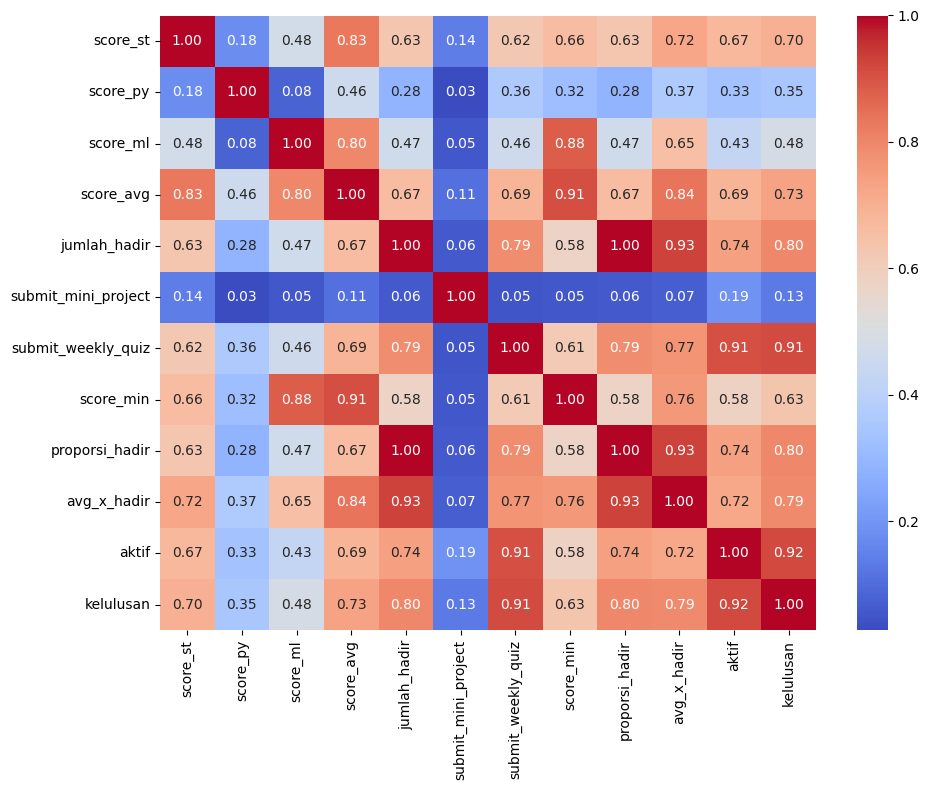

In [98]:
fitur = [
    "score_st", "score_py", "score_ml", "score_avg",
    "jumlah_hadir", "submit_mini_project", "submit_weekly_quiz",
    "score_min", "proporsi_hadir", "avg_x_hadir", "aktif",'kelulusan'
]
korelasi = data_train[fitur].corr()
plt.figure(figsize=(10,8))
sns.heatmap(korelasi,annot=True,cmap='coolwarm',fmt='.2f')
plt.tight_layout()
plt.show()

## Drop fitur yang punya korelasi rendah

In [99]:
data_train.drop(columns=['score_py','score_ml','submit_mini_project','jumlah_hadir'],inplace=True)
data_test.drop(columns=['score_py','score_ml','submit_mini_project','jumlah_hadir'],inplace=True)

In [100]:
data_train

,id,score_st,score_avg,submit_weekly_quiz,proporsi_hadir,score_min,avg_x_hadir,aktif,kelulusan
0,b65d1017-228d-483a-b0eb-3ac26cc9e9bd,75,68.333333,0,0.9,50,615.000000,0,0
1,b65d1017-228d-483a-b0eb-3ac26cc9e9bd,75,85.000000,0,0.9,75,765.000000,0,0
2,d0635b9d-75d2-410b-88f3-65c842f791ab,70,43.333333,0,1.0,0,433.333333,1,0
3,d0635b9d-75d2-410b-88f3-65c842f791ab,70,50.000000,0,1.0,0,500.000000,1,1
4,d0635b9d-75d2-410b-88f3-65c842f791ab,100,53.333333,0,1.0,0,533.333333,1,1
...,...,...,...,...,...,...,...,...,...
563,e475dfa1-7057-4718-8cec-82e17d598919,0,23.333333,0,1.5,0,350.000000,0,0
564,e475dfa1-7057-4718-8cec-82e17d598919,0,33.333333,0,1.5,0,500.000000,0,0
565,953b2a78-6245-4cb2-a68a-5f0bc4dfe914,0,30.000000,0,0.0,0,0.000000,0,0
566,96908bfe-dea7-4750-8ed8-6e5364b3527c,0,20.000000,0,0.0,0,0.000000,0,0


In [101]:
data_test

,id,score_st,score_avg,submit_weekly_quiz,proporsi_hadir,score_min,avg_x_hadir,aktif
0,052163ac-09b6-42b7-9543-63a104b92f5a,80,70.000000,0,1.9,50,1330.000000,0
1,7e3f0447-7e96-4840-91a0-8b7383c9abb3,80,73.333333,0,1.7,50,1246.666667,0
2,7e3f0447-7e96-4840-91a0-8b7383c9abb3,80,86.666667,0,1.7,80,1473.333333,0
3,3e420336-5598-4e32-99a0-329943678614,85,78.333333,0,1.7,70,1331.666667,1
4,3e420336-5598-4e32-99a0-329943678614,85,85.000000,0,1.7,80,1445.000000,0
5,81b176fd-9afc-4aa0-821b-95c031f03e98,90,73.333333,0,1.9,60,1393.333333,1
6,81b176fd-9afc-4aa0-821b-95c031f03e98,90,86.666667,0,1.9,70,1646.666667,0
7,81b176fd-9afc-4aa0-821b-95c031f03e98,95,75.000000,0,1.9,60,1425.000000,0
8,81b176fd-9afc-4aa0-821b-95c031f03e98,95,88.333333,0,1.9,70,1678.333333,1
9,f9b2def2-c8ea-436c-bf7c-934a1742b0af,60,46.666667,0,3.1,0,1446.666667,0


In [102]:
data_train.columns

Index(['id', 'score_st', 'score_avg', 'submit_weekly_quiz', 'proporsi_hadir',
       'score_min', 'avg_x_hadir', 'aktif', 'kelulusan'],
      dtype='object')

# Modeling

In [103]:
fitur = ['score_st', 'score_avg', 'submit_weekly_quiz', 'proporsi_hadir',
       'score_min', 'avg_x_hadir', 'aktif']

X = data_train[fitur]
y = data_train['kelulusan']

In [104]:
# parameter model
params = {
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss',
    'max_depth' : 4,
    'eta' : 0.1,
    'subsample' : 0.8,
    'colsample_bytree' : 0.8,
    'random_state' : 42
}

In [105]:
# model dengan xgboost dengan kfold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X))

final_model = None

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)

    model = xgb.train(params, dtrain, num_boost_round=100,
                      evals=[(dval, 'valid')],
                      early_stopping_rounds=10,
                      verbose_eval=False)
    
    oof_preds[val_idx] = model.predict(dval) > 0.5
    final_model = model 

In [106]:
# akurasi
balanced_acc = balanced_accuracy_score(y, oof_preds)
print(f"Akurasi OOF (Training): {balanced_acc:.4f}")

Akurasi OOF (Training): 0.9990


In [107]:
# prediksi
data_test_indexed = data_test.set_index('id')

all_predictions = []

for an_id in prediction_id['ID']:
    try:
        features_for_one_id = data_test_indexed.loc[[an_id]][fitur]
        dtest = xgb.DMatrix(features_for_one_id)
        prediction = final_model.predict(dtest)[0]
        label = 1 if prediction > 0.5 else 0
        all_predictions.append(label)
    except KeyError:
        all_predictions.append(0)

In [108]:
# submission
label_map = {1: "Lulus", 0: "Tidak Lulus"}
prediction_labels = [label_map[p] for p in all_predictions]

submission_df = pd.DataFrame({
    'ID': prediction_id['ID'],
    'label': prediction_labels
})

submission_df.to_csv("submission_8.csv", index=False)
print(submission_df.head())

                                     ID        label
0  0028102b-576f-4819-b1df-8c0e7ae0247b        Lulus
1  008479a4-622a-4a22-8e5a-81e671535445        Lulus
2  009762eb-c062-41fd-9a2b-144b65f33c3b  Tidak Lulus
3  014747f3-0710-4304-bf06-77433ef94d09        Lulus
4  0289a1dd-32ab-46a3-bd41-e8741e2728fb  Tidak Lulus
